## Auther: Mohammed Sherif Safa

## #Task 3 Exploratory Data Analysis- Retail

## The Sparks Foundation (GRIP) 

## 1-United States store 
The Store in United States contain a lot of information about sales in each state within each city, abd also contian the category of sales with sub category, the data show us the amount of sales with how many quantities were bought, there is also a discount for units, we are going to dive insights and look at the profits and weak areas, let's load it and take a look

In [720]:
#importing all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [721]:
#import dataset 
sampleSuperStore= pd.read_csv(r"dataset\SampleSuperstore.csv")
#show the first 5 rows
sampleSuperStore.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Describtion
 - Ship Mode : contain the methods of shipping such as ("Standard Class", "First Class", "Second Class", "Smae Day"), data type : object.
 - Segment : containt the different types of customers or markets such as ("Consumer","Corporate", "Home Office"), data type : object.
 - Country : contain the name of country which is United States, data type : object.
 - City : contain the name of city within each state like: "Henderson", "Los Angeles", data type : object.
 - State : contain the name of each state inside the United States like: "Kentucky", "California", data type : object.
 - Postal Code: refer to the postal code of each city, data type : integer
 - Region : refer to the area of the country such as ("South", "West", "East", "Centeral"), data type : object
 - Category : refer to the category of goods such as ("Furniture", "Office Supplies", "Technology"), data type: object.
 - Sub-Category : refer to the subcategory in each category  like : "Bookcases", "Storage", data type : object.
 - Sales : refer to the sales for each city made, data type : float.
 - Quantity : refer to the number of goods in each subcategory, data type : integer.
 - Discount :  refer to the offerings on goods, data type : float.
 - Profit : refer to the profit made by each city, data type : float. 

In [722]:
#show information 
sampleSuperStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [723]:
# display the summary statistics of dataset
sampleSuperStore.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 2-So,which the most shipping mode the purchaser used?

It's known that there are different ship mode for the purchasers when he decide to buy something , we take  a look for what the most method used and the segment who decide?, also we notice that which category sold by the different methods of ship mode?

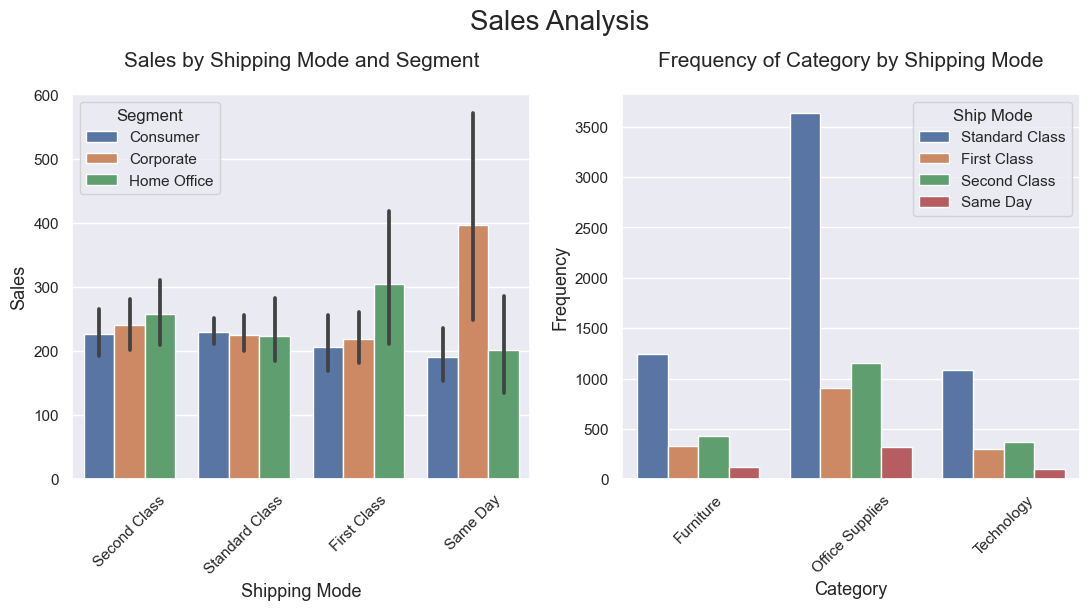

In [724]:
# create a figure with two subplots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# plot sales by Ship Mode and Segment on the first subplot
sns.barplot(data=sampleSuperStore, x="Ship Mode", y="Sales", hue="Segment", ax=ax[0])
ax[0].set_title("Sales by Shipping Mode and Segment", fontsize=15, y=1.05)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel("Shipping Mode", fontsize=13)
ax[0].set_ylabel("Sales", fontsize=13)

# plot sales by Category and Ship Mode on the second subplot
sns.countplot(data=sampleSuperStore, x="Category", hue="Ship Mode", hue_order=["Standard Class", "First Class", "Second Class", "Same Day"], ax=ax[1])
ax[1].set_title("Frequency of Category by Shipping Mode", fontsize=15, y=1.05)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel("Category", fontsize=13)
ax[1].set_ylabel("Frequency", fontsize=13)
# add a main title to the entire figure
fig.suptitle("Sales Analysis", fontsize=20,y=1.05)

# display the plot
plt.show()

## 3- The weak area?

as we noticed, there are weak areas with a drastic profits, can you imagine how many? 

In [744]:
#create function to implement pie chart
def pie_chart(df:pd.DataFrame,column:str,ax1:plt.Axes,Title:str):
 
    pieData=pd.DataFrame(df[column].value_counts())
    labels = pieData.index.values
    sizes = pieData[column].values
    ax1.set_title(Title)
    color= sns.color_palette("muted")
    ax1.pie(sizes, labels=labels,colors=color, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis("off")

#create function to implement bar plot
def bar_plot(df:pd.Series,ax:plt.Axes,Title:str,xlabel:str,ylabel:str,rotation_xlabel:int):

    color= sns.color_palette("muted")
    sns.barplot(x=df.index, y=df.values,ax=ax,palette=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_xlabel)
    ax.set_title(Title, y=1.05, fontsize=20)
    ax.set_xlabel(xlabel,fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

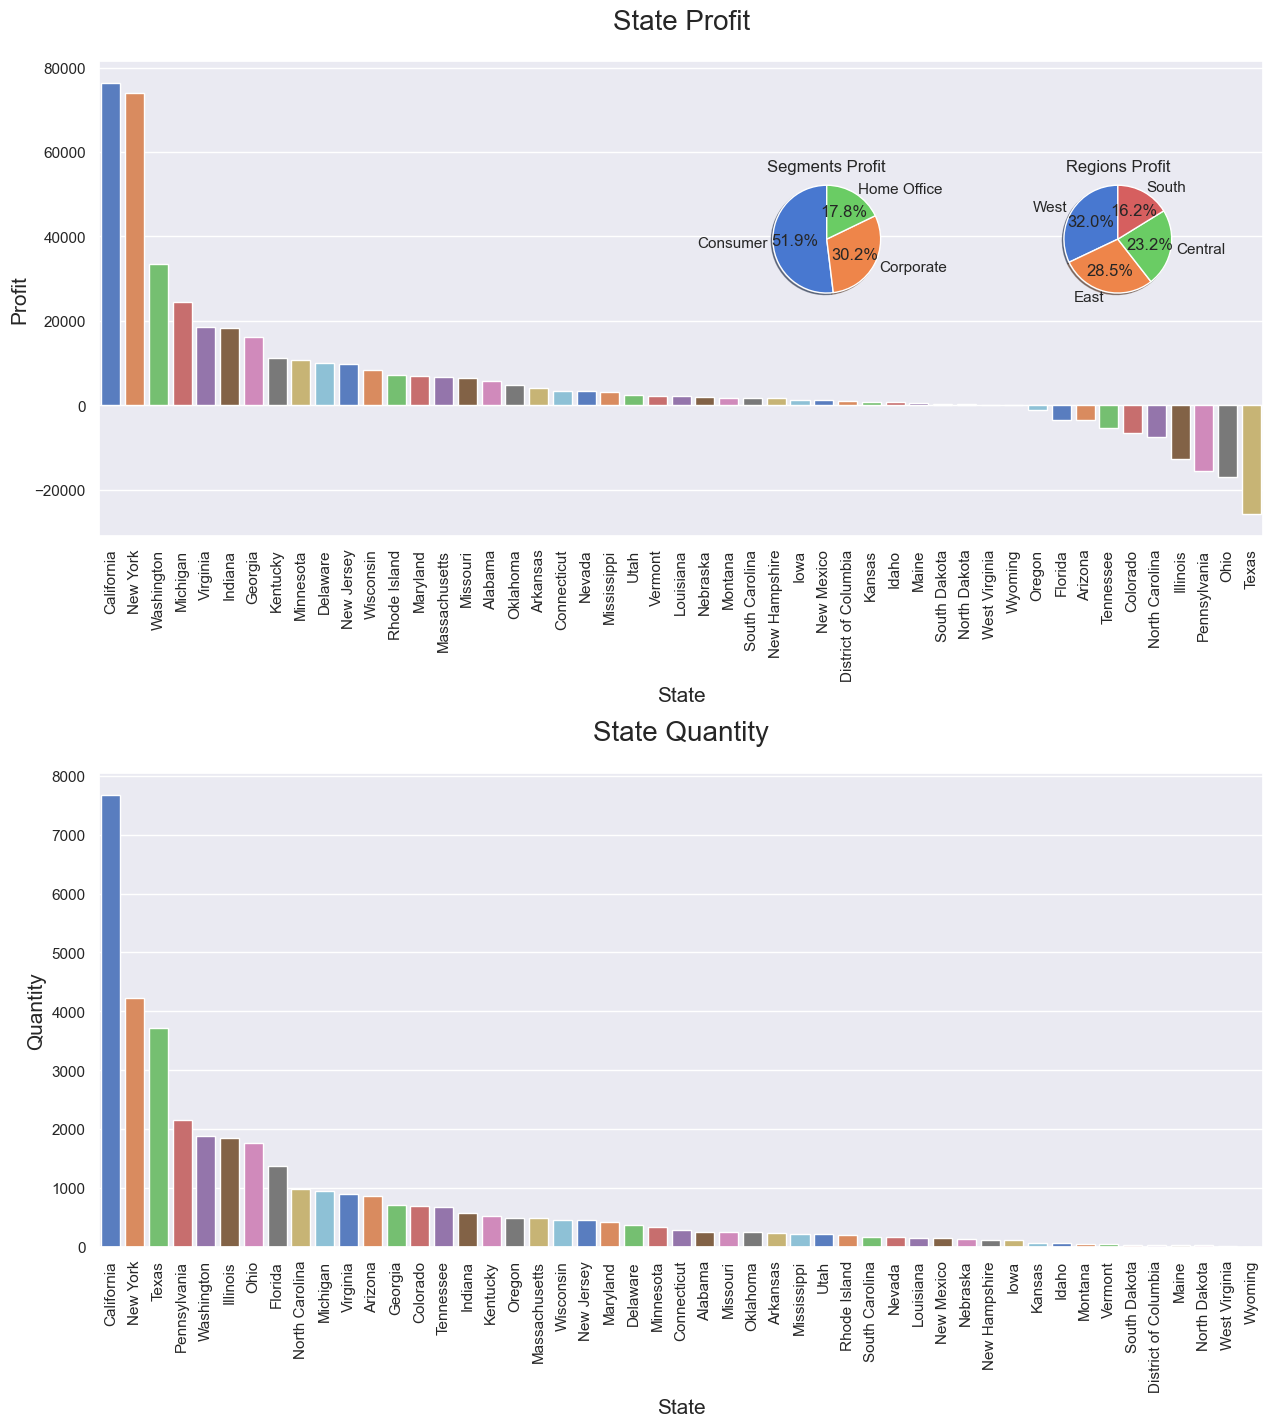

In [745]:
#group the dataset by state to make Series of profit 
state_profit= sampleSuperStore.groupby(by="State")["Profit"].sum()
state_profit.sort_values(ascending=False, inplace=True)

#group the dataset by state to make Series quantity
state_quant= sampleSuperStore.groupby(by="State")["Quantity"].sum()
state_quant.sort_values(ascending=False, inplace=True)

# create a figure with two subplots side by side
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(13,13))

#plot the state profit
sns.set(rc={'figure.figsize':(13,8)})
bar_plot(state_profit,ax[0], "State Profit", "State","Profit", 90)
RegionsPie=ax[0].inset_axes([0.75,0.5,0.25,0.25])
Segments=ax[0].inset_axes([0.5,0.5,0.25,0.25])
pie_chart(sampleSuperStore,"Region",RegionsPie,"Regions Profit")
pie_chart(sampleSuperStore,"Segment",Segments,"Segments Profit")
plt.tight_layout()

#plot the state quantity
bar_plot(state_quant,ax[1],"State Quantity","State", "Quantity",90)

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


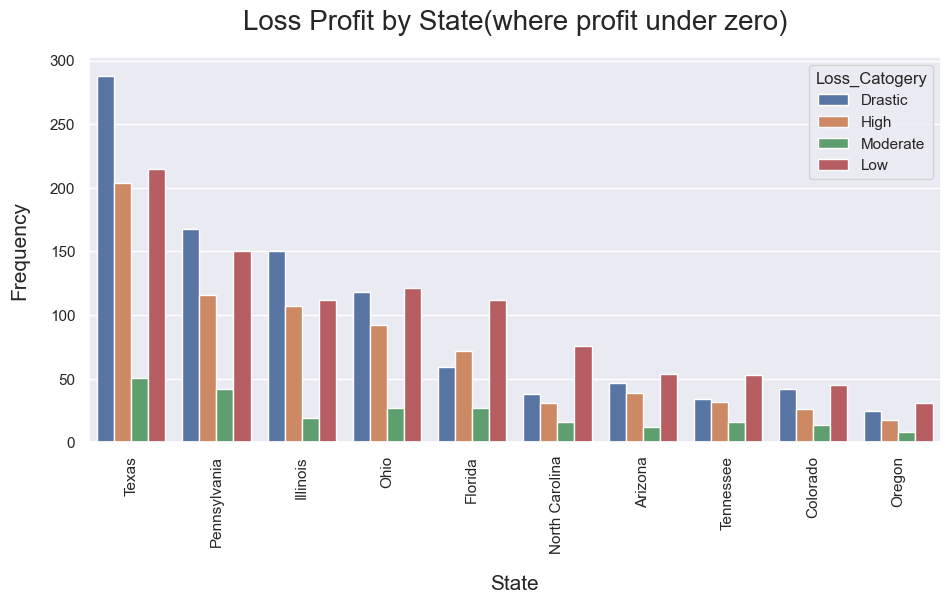

In [746]:
# create a subset of the data with weak Profit < 0
state_profitreset= sampleSuperStore.groupby(by="State")["Profit"].sum().reset_index()
state_NegProfit=state_profitreset[state_profitreset["Profit"]<0].State.tolist()
weak_area = sampleSuperStore[sampleSuperStore.State.isin(state_NegProfit)==True]

# define the category labels and bins
labels=["Drastic", "High", "Moderate","Low"]
low = weak_area["Profit"].quantile(0.25)
moderate =  weak_area["Profit"].median()
high =weak_area["Profit"].quantile(0.75)  
drastic = weak_area["Profit"].min()
bins = [0, low, moderate, high, drastic]
bins.sort()

# categorize the Profit values into the labels and bins
weak_area["Loss_Catogery"]= pd.cut(weak_area["Profit"], labels = labels, bins = bins) 

# create a count plot of Profit_Catogery by State
plt.figure(figsize=(11,5))
sns.countplot(data= weak_area, x="State", hue="Loss_Catogery",order=weak_area['State'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("State", labelpad =15, fontsize=15)
plt.ylabel("Frequency",labelpad =15, fontsize=15)
plt.title("Loss Profit by State(where profit under zero)", fontsize=20,y=1.05)
plt.show()

## 4- Where's the problem?

Now look for the plot of loss profit, we have already known that ("Texas", "Pennsylvania", "Illinois") are the most three weak states, but where's the problem? it maybe from fewer discount, less sells, or the ship mode not satisfied the purchasers, let's figure the problems!

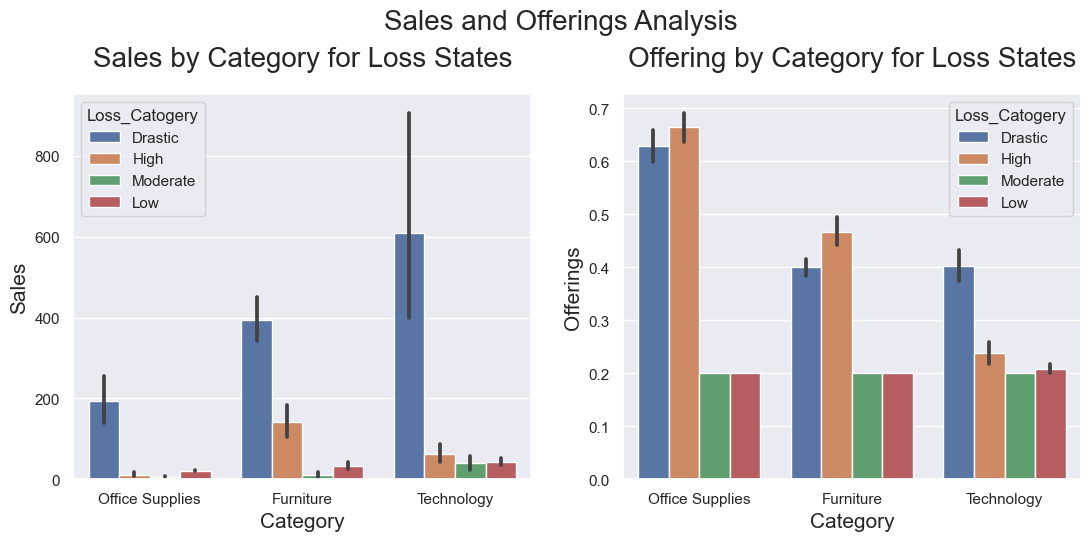

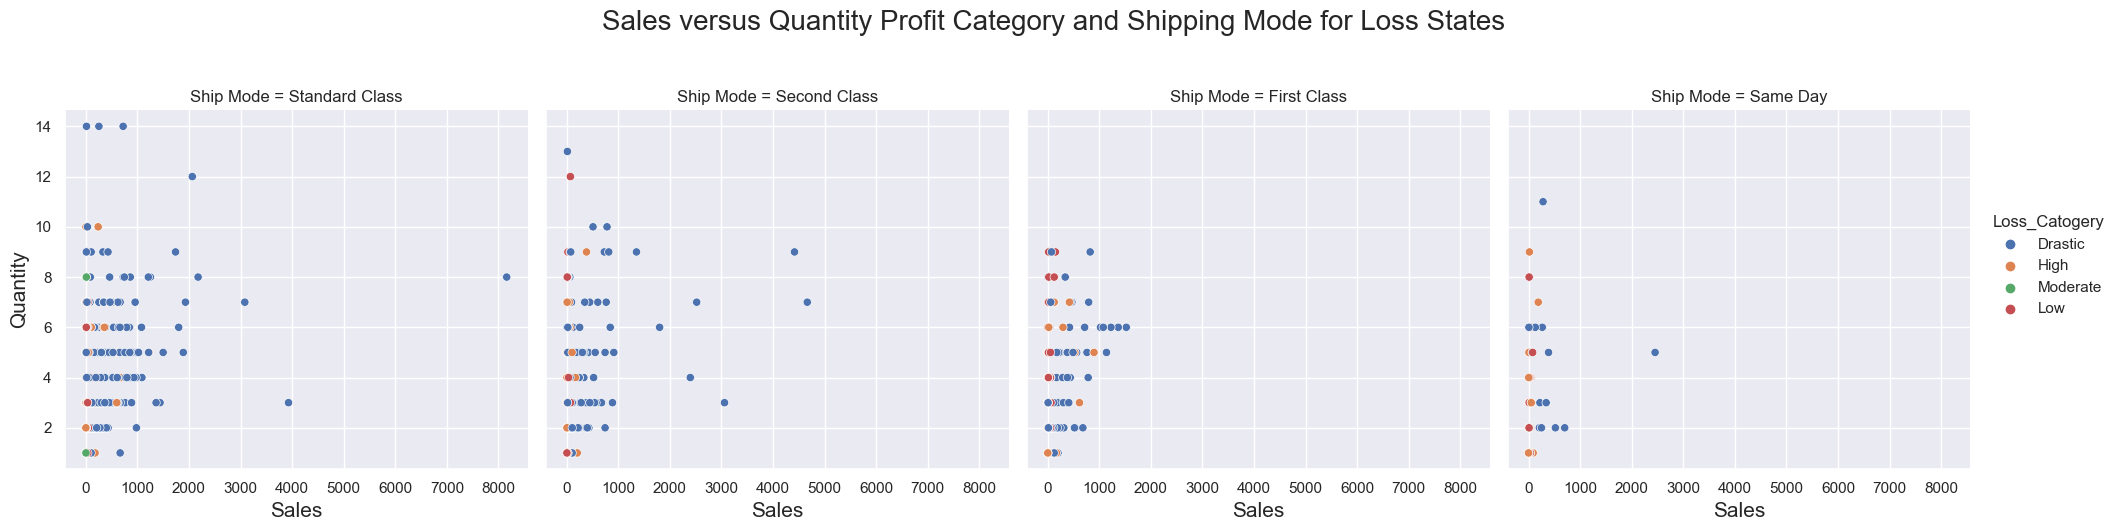

In [747]:
# select the most three state loss
state_list=["Texas","Pennsylvania","Illinois"]
loss_state= weak_area.loc[weak_area["State"].isin(state_list)]

# create a figure with two subplots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# plot Sales by Category and Profit Category for the three states with loss on the first subplot
sns.barplot(data=loss_state, x="Category", y="Sales", hue="Loss_Catogery",ax=ax[0], order= loss_state['Category'].value_counts().index)
ax[0].set_xlabel("Category",fontsize=15)
ax[0].set_ylabel("Sales", fontsize=15)
ax[0].set_title("Sales by Category for Loss States", fontsize=20, y=1.05)

# plot offering by Category and Profit Category for the three states with loss on the first subplot
sns.barplot(data= loss_state , x="Category", y="Discount", hue="Loss_Catogery",ax=ax[1])
ax[1].set_xlabel("Category",fontsize=15)
ax[1].set_ylabel("Offerings", fontsize=15)
ax[1].set_title("Offering by Category for Loss States", fontsize=20, y=1.05)

# add a main title to the entire figure
fig.suptitle("Sales and Offerings Analysis", fontsize=20,y=1.05)

# display the plot
plt.show()

# plot Sales versus Quantity, colored by Profit Category, and faceted by Ship Mode for the three states with loss on the second subplot
ax3=sns.relplot(data=loss_state, x="Sales", y="Quantity", hue="Loss_Catogery", col="Ship Mode")
ax3.set_axis_labels("Sales", "Quantity",fontsize=15)
ax3.fig.suptitle("Sales versus Quantity Profit Category and Shipping Mode for Loss States", fontsize=20, y=1.05)
for ax in ax3.axes.flat:
    ax.set_xlabel("Sales")
plt.subplots_adjust(top=0.85)
plt.show()

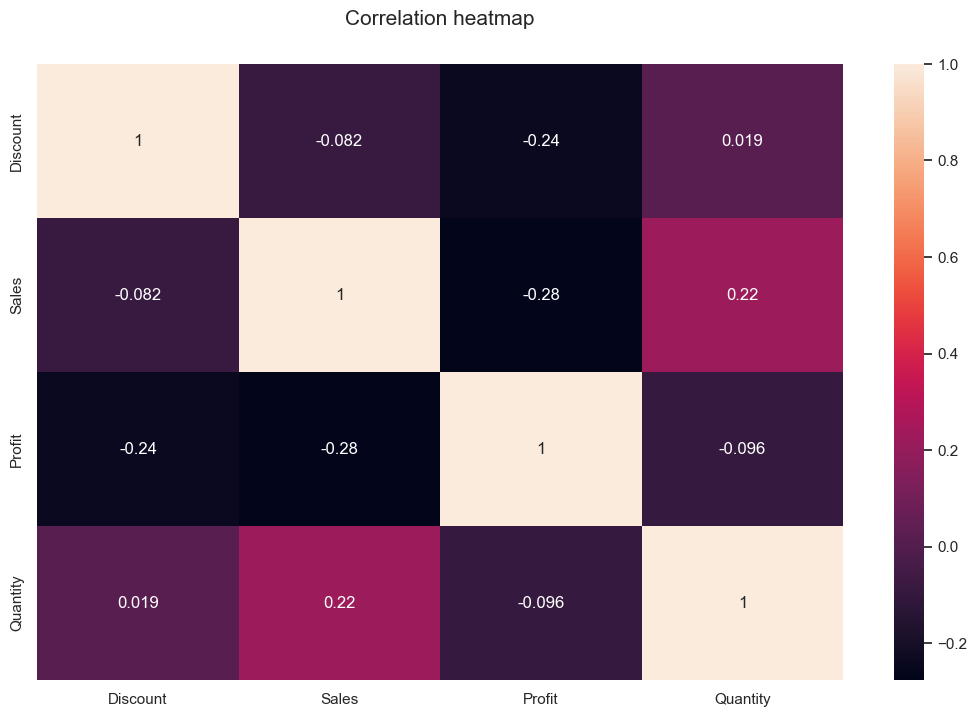

In [748]:
# plot the correlation between Discount, Sales, Profit, and Quantity
ax=sns.heatmap(loss_state[["Discount","Sales","Profit","Quantity"]].corr(),annot=True)
ax.set_title("Correlation heatmap", fontsize=15, y=1.05)
plt.show()

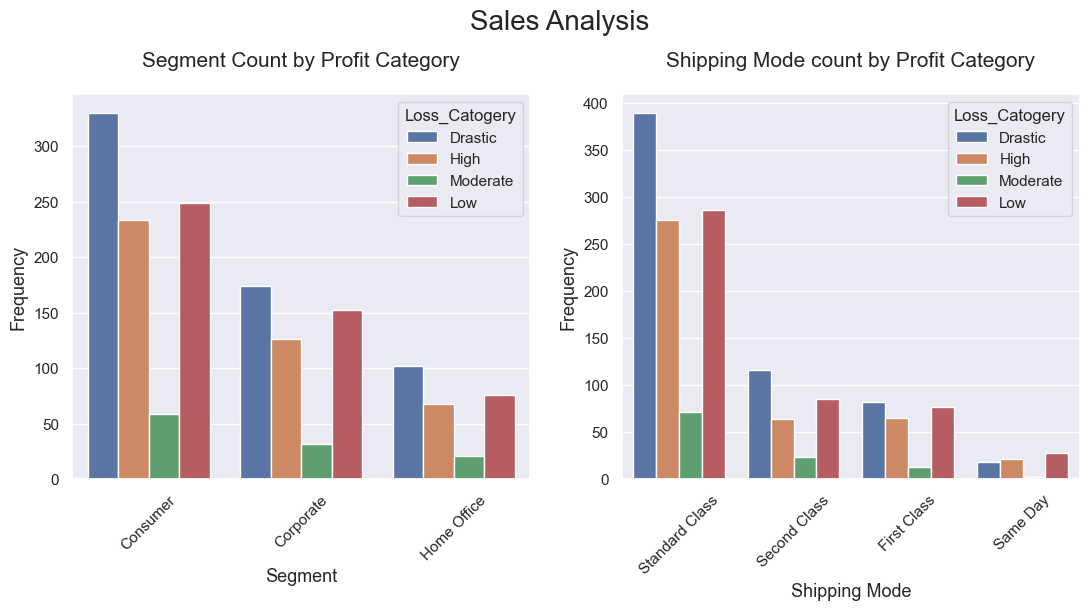

In [749]:
# create a figure with two subplots side by side
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

#plot count for Segment by loss profits
sns.countplot(data=loss_state, x="Segment", hue="Loss_Catogery", ax=ax[0], order=loss_state['Segment'].value_counts().index)
ax[0].set_title('Segment Count by Profit Category', y=1.05, fontsize=15)
ax[0].set_xlabel('Segment',fontsize=13)
ax[0].set_ylabel('Frequency', fontsize=13)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

#plot count for Ship Mode by loss profits
sns.countplot(data= loss_state, x="Ship Mode", hue="Loss_Catogery", ax=ax[1])
ax[1].set_title('Shipping Mode count by Profit Category', fontsize=15, y=1.05)
ax[1].set_xlabel('Shipping Mode',fontsize=13)
ax[1].set_ylabel('Frequency', fontsize=13)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

# add a main title to the entire figure
fig.suptitle("Sales Analysis", fontsize=20,y=1.05)

# display the plot
plt.show()


In [752]:
#calculate total profit
totalprofit=0
for val in state_profitreset.Profit:
    totalprofit += val

#calculate total sales
totalrevenue=0
for val in sampleSuperStore.Sales:
    totalrevenue += val
    
#calculate total expense
totalexpense = totalrevenue - totalprofit

# calculate the state with the most profit
state_profitreset= state_profitreset.sort_values(by="Profit",ascending=False)
most_profit_state = {state_profitreset.iloc[0]["State"]: state_profitreset.iloc[0]["Profit"]}

# calculate the state with the least profit
least_profit_state = {state_profitreset.iloc[-1]["State"]: state_profitreset.iloc[-1]["Profit"]}

#get the most category sold
category_sold = sampleSuperStore["Category"].value_counts().sort_values(ascending= False).reset_index()
most_category_sold= {category_sold.iloc[0]["index"]: category_sold.iloc[0]["Category"]}

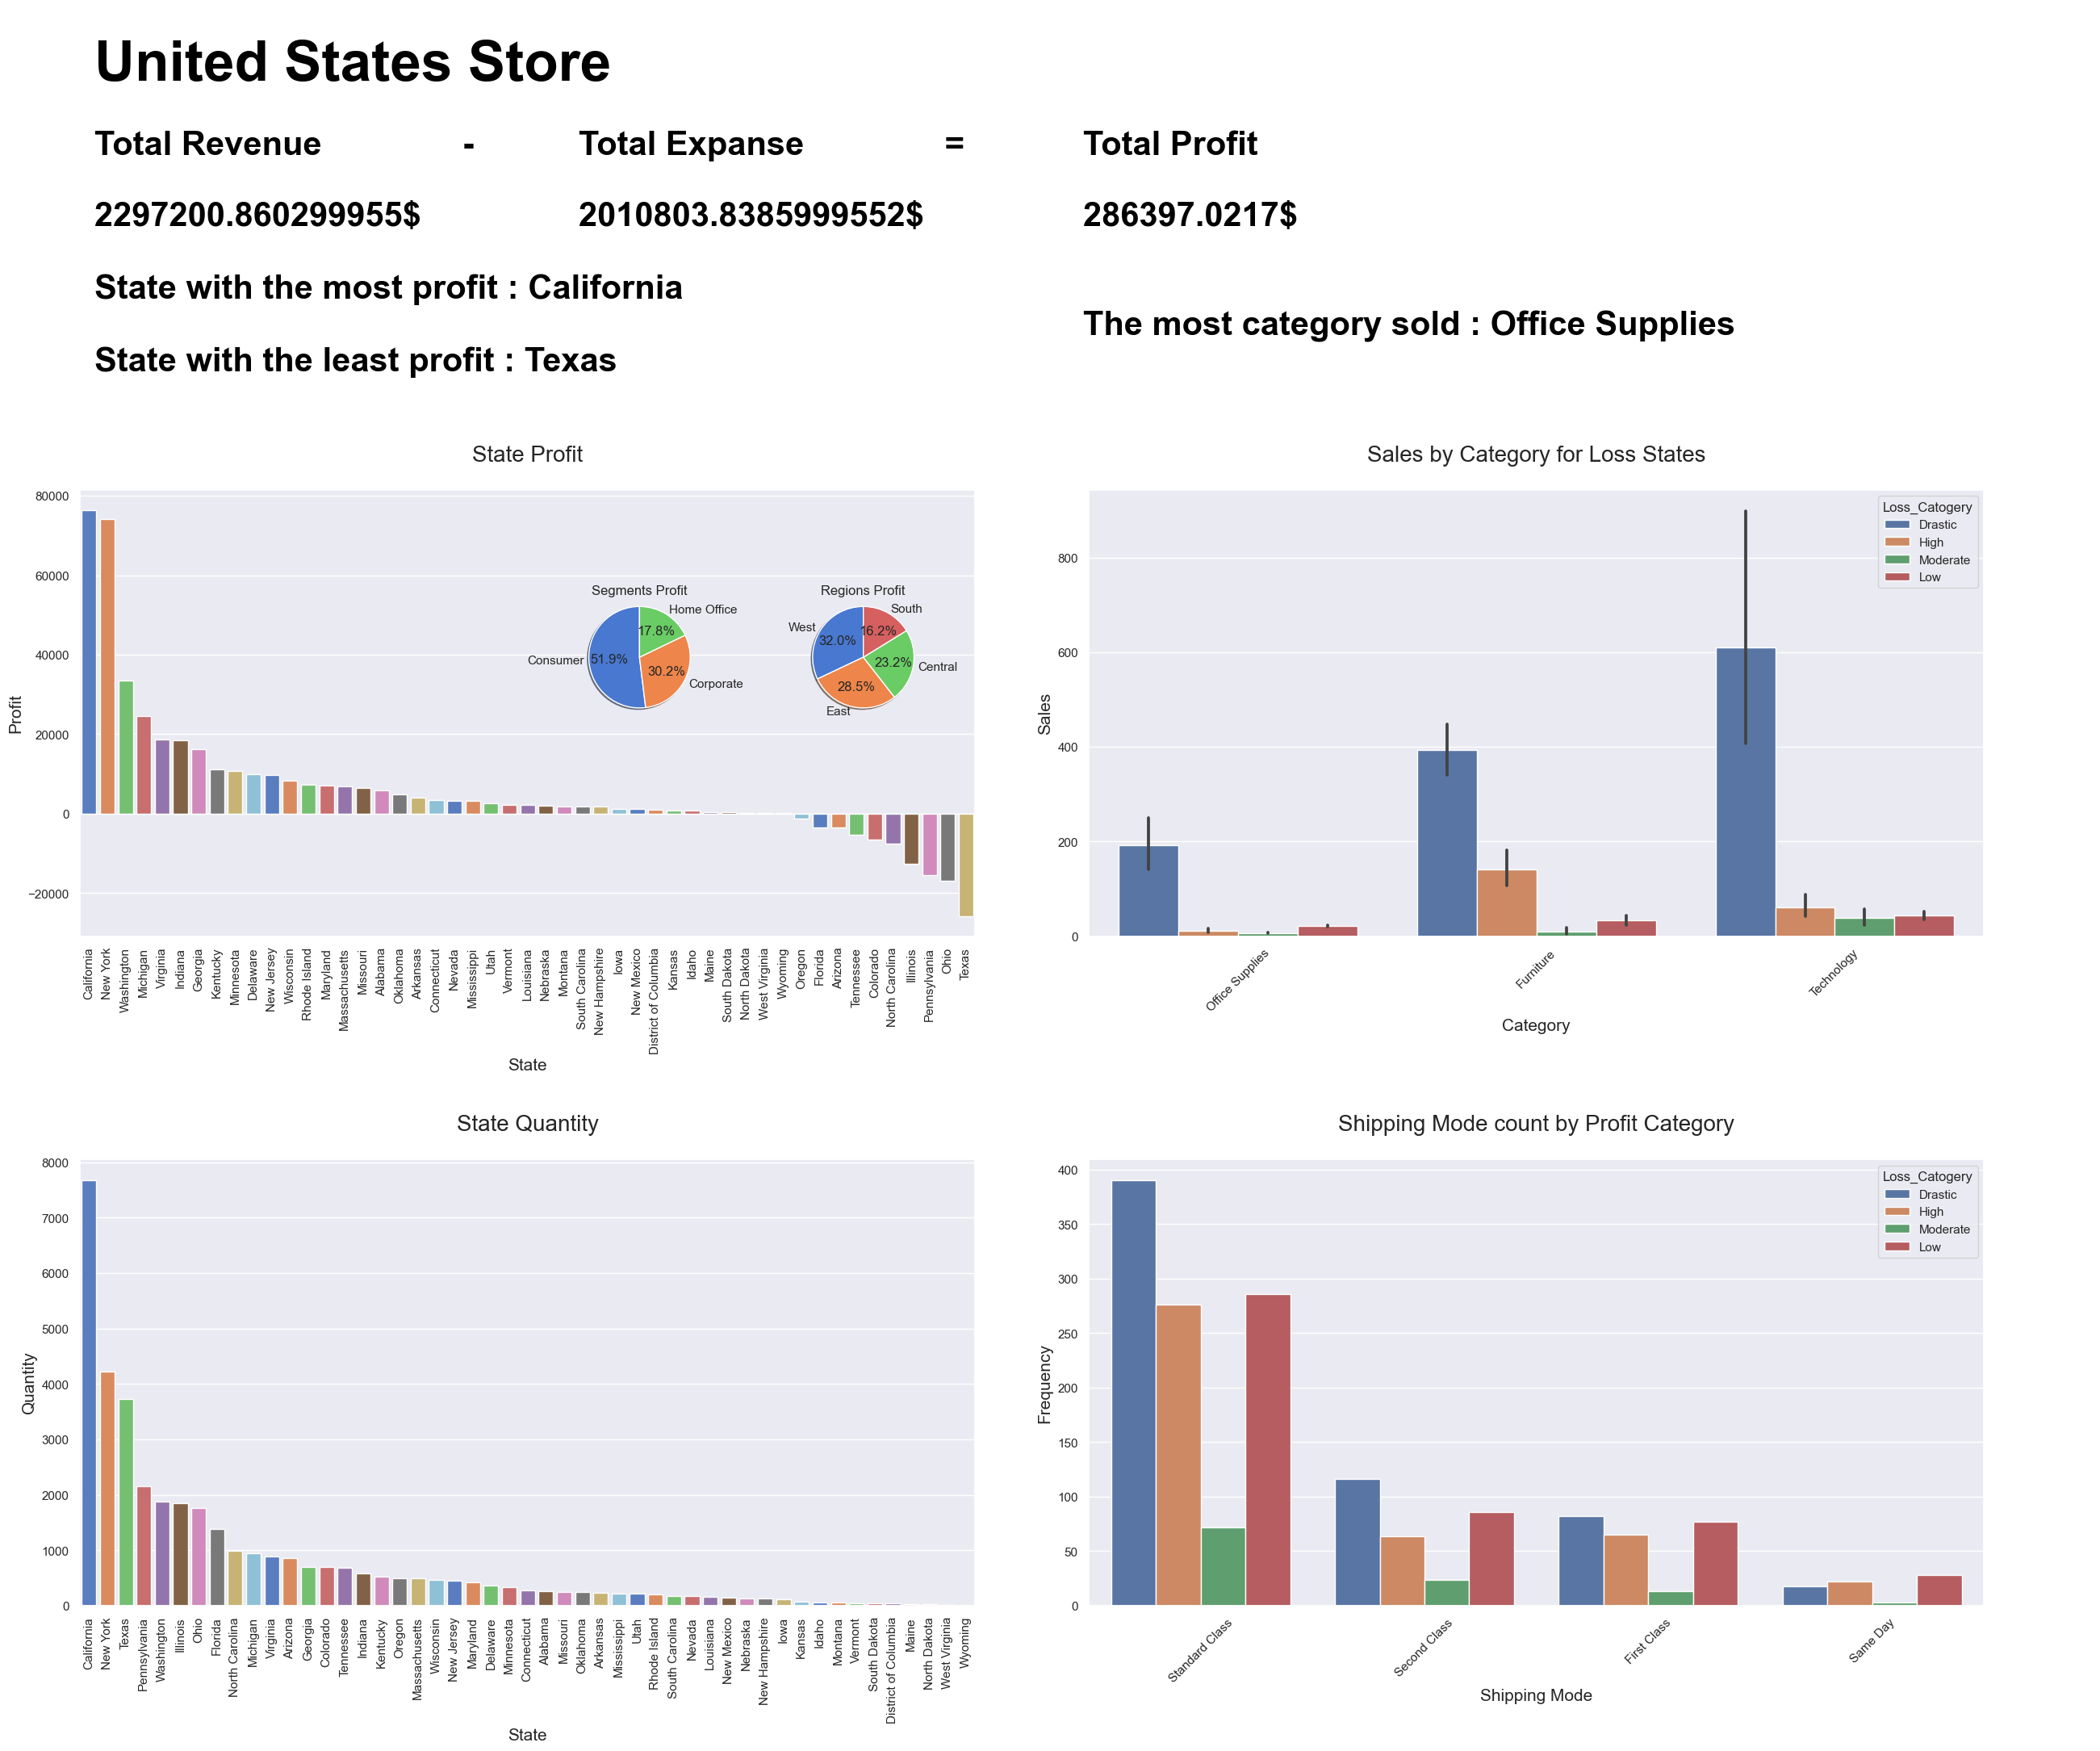

In [755]:
fig = plt.figure(layout="constrained",figsize=(25,15))
fig.set_facecolor("white")
subfigs = fig.subfigures(1,2,zorder=-1)
subfigs[0].set_facecolor("white")
subfigs[1].set_facecolor("white")
Header = fig.add_axes((0.05,1.05,1,0.3))
Header.axis("off")
Header.text(0.01,0.8,f"United States Store",fontsize=50,color="black",font="Arial",fontweight='bold')
Header.text(0.01,0.4,f"Total Revenue               -\n\n{ totalrevenue }$ ",fontsize=30,color="black",font="Arial",fontweight='bold')
Header.text(0.25,0.4,f"Total Expanse               =\n\n{ totalexpense }$",fontsize=30,color="black",font="Arial",fontweight='bold')
Header.text(0.5,0.4,f"Total Profit    \n\n{ totalprofit }$ ",fontsize=30,color="black",font="Arial",fontweight='bold')

Header.text(0.01,0.2,f"State with the most profit : {', '.join(most_profit_state.keys())}",fontsize=30,color="black",font="Arial",fontweight='bold')
Header.text(0.01,0,f"State with the least profit : {', '.join(least_profit_state.keys())}",fontsize=30,color="black",font="Arial",fontweight='bold')
Header.text(0.5,0.1,f"The most category sold : {', '.join(most_category_sold.keys())}",fontsize=30,color="black",font="Arial",fontweight='bold')



######################################################################

state = subfigs[0].subplots(2, 1)


#plot the state profit
bar_plot(state_profit,state[0], "State Profit", "State","Profit", 90)
RegionsPie=state[0].inset_axes([0.75,0.5,0.25,0.25])
Segments=state[0].inset_axes([0.5,0.5,0.25,0.25])
pie_chart(sampleSuperStore,"Region",RegionsPie,"Regions Profit")
pie_chart(sampleSuperStore,"Segment",Segments,"Segments Profit")
plt.tight_layout()

#plot the state quantity
bar_plot(state_quant,state[1],"State Quantity","State", "Quantity",90)

# adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)

######################################################################
cat_ship= subfigs[1].subplots(2, 1)

# plot Sales by Category and Profit Category for the three states with loss on the first subplot
sns.barplot(data=loss_state, x="Category", y="Sales", hue="Loss_Catogery",ax=cat_ship[0], order= loss_state['Category'].value_counts().index)
cat_ship[0].set_xlabel("Category",fontsize=15)
cat_ship[0].set_ylabel("Sales", fontsize=15)
cat_ship[0].set_title("Sales by Category for Loss States", fontsize=20, y=1.05)
cat_ship[0].set_xticklabels(cat_ship[0].get_xticklabels(), rotation=45)

#plot count for Ship Mode by loss profits
sns.countplot(data= loss_state, x="Ship Mode", hue="Loss_Catogery", ax=cat_ship[1])
cat_ship[1].set_title('Shipping Mode count by Profit Category', fontsize=20, y=1.05)
cat_ship[1].set_xlabel('Shipping Mode',fontsize=15)
cat_ship[1].set_ylabel('Frequency', fontsize=15)
cat_ship[1].set_xticklabels(cat_ship[1].get_xticklabels(), rotation=45)

######################################################################

plt.show()

# Recommandations for:

1. Category:

 - Shoulding expand product offering discounts or promotions to attract more purchasers.

 - Improve customer experience, Focus on improving the customer experience by providing better customer support, improving the quality of products.

 - Implement loyalty programs to retain existing customers.

2. Ship Mode:

 - Review the strategies of ship mode and adjusting the prices to increas revenue.
 - Make offerings on some goods by choose one of the ship mode methods.

 - you can adjust the customer’s shipping costs depending on their location. Designate free shipping to areas where it’s more affordable, and charge a bit more for other places.

 - Do survey after each purchase to take notes and analyze the response to enhance the service